<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/March%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance


In [3]:
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

[*********************100%***********************]  1 of 1 completed


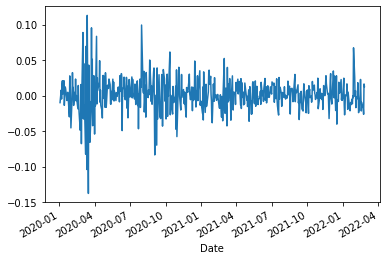

In [4]:
apple = yf.download("AAPL", start = "2020-1-1", end = "2022-2-28")
St = apple['Adj Close']
initial_price = St[-1]
returns = St.pct_change()
ln_returns = np.log(1+ returns)
log_returns = ln_returns[1:543]
log_returns.plot()

In [43]:
M = 1000
N = 252
nudt = 0
volsdt = log_returns.std()
lnS = np.log(initial_price)

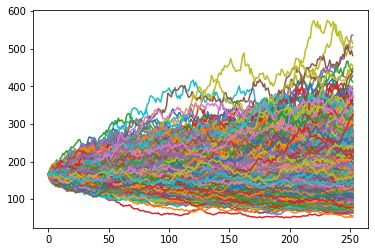

In [44]:
Z = np.random.normal(size=(N, M))
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)
plt.plot(ST)
plt.show()

176.85708306346274 2.253774216971629


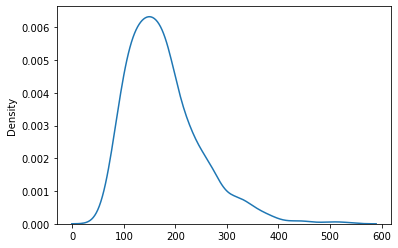

In [45]:
final_day = ST[-1]
sns.kdeplot(final_day)
mean0 = final_day.mean()
se0 = final_day.std()
print(mean0,se0/np.sqrt(M))

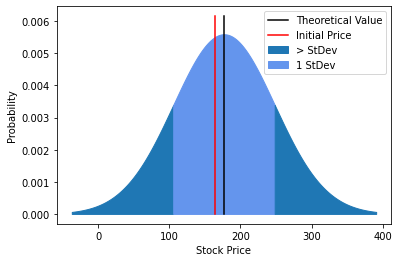

In [46]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot


Now, Let's observe the effect of increased number of simulations. 

In [5]:
M = 10**5
N = 252
nudt = 0
volsdt = log_returns.std()
lnS = np.log(initial_price)

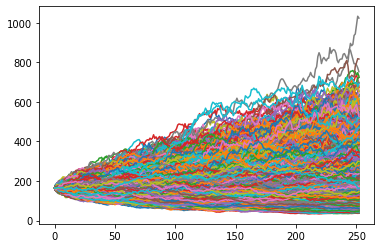

In [6]:
Z = np.random.normal(size=(N, M))
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)
plt.plot(ST)
plt.show()


176.78789515010004 68.01044726114861


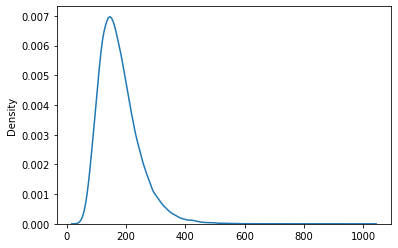

In [8]:
final_day = ST[-1]
sns.kdeplot(final_day)
mean0 = final_day.mean()
se0 = final_day.std()
print(mean0,se0)

In [9]:
print(final_day.max(), final_day.min())

1023.6458720232058 37.09797083757792


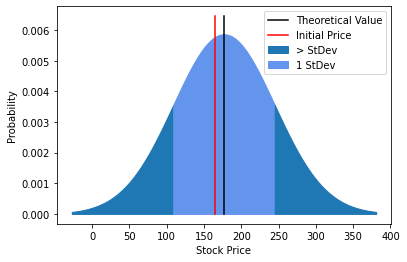

In [10]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

I just showed you the impact of changing the number of simulation in the results of the monte carlo simulation. Let me check the impact of having a different random number generator. Lagged fibonacci generator will generate uniform random number.

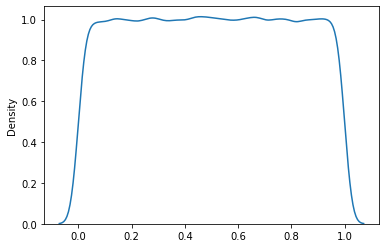

In [11]:
#Lagged Fibonacci Generator For Uniform Random Numbers

# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 252000 + 1
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 


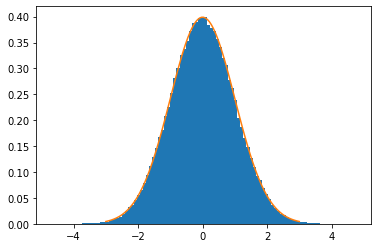

In [12]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    #theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    theta = 2*np.pi * U3[j]
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(252000)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
N1 = Y
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))

#characteristics function for arbitrary mu and sigma for normal distribution

#def phi(X, mu, sigma):
#  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

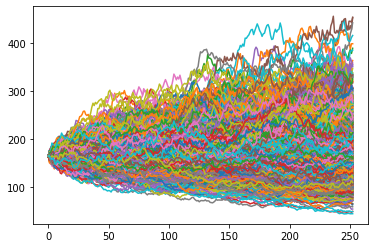

In [19]:
M = 1000
N = 252
Z1 = np.reshape(N1, (252,1000))
delta_lnSt = nudt + volsdt*Z1
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)
plt.plot(ST)
plt.show()


173.65417228062392 64.55090397556347


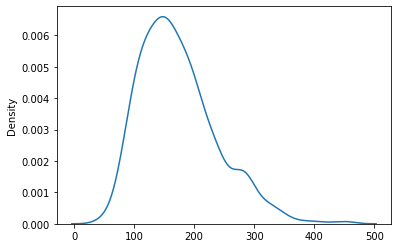

In [20]:
final_day = ST[-1]
sns.kdeplot(final_day)
mean0 = final_day.mean()
se0 = final_day.std()
print(mean0,se0)

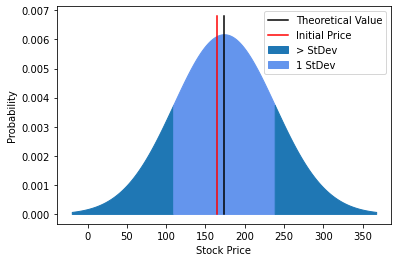

In [21]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

Remaining: Check MSE and Variance of density
find confidence intervals

